# Lab 1 Four Peak NonLinearity Analysis

In [2]:
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from matplotlib import gridspec
from scipy.optimize import curve_fit

%matplotlib inline


In [3]:
class initialCleanUp:
    """ Cleaning up of the raw oscilliscope data. """
    def __init__(self, dataset):
        self.dataset = dataset
    
    def removeColsAndRows(self, dataStartRow):

        """
        Remove columns and rows that aren't useful for
        plotting.
        DataStartRow is the row where the data starts in the file.
        """

        self.dataset.drop(self.dataset.columns[[2]], axis=1, inplace=True)


        self.dataset = self.dataset.drop(labels=range(0, dataStartRow), axis=0)

        return self.dataset
    
class findPeaks:
    """ Finding the peaks of a panda dataset. """
    def __init__(self, data):
        self.data = data
    
    def max(self):
        """ 
        Find the maximum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        max_index = self.data.y.argmax()
        y_position_max = self.data.iloc[max_index+40, 0:2]
        return y_position_max
    
    def min(self):
        """ 
        Find the minimum values and all of its corresponding row values.
        The twenty is so the values are off the exact peak by a little,
        it was suggested this would be a good step.
        """
        min_index = self.data.y.argmin()
        y_position_min = self.data.iloc[min_index-40, 0:2]
        return y_position_min
        
        

Text(0.5, 1.0, 'This is a plot of the raw data from the oscilliscope. ')

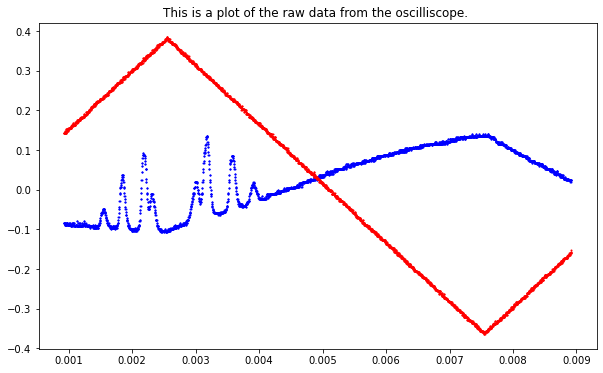

In [4]:
# Get the raw data from the oscilloscopes output
raw4peakData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH1.CSV')

rawTriangleWaveData = pd.read_csv('/Users/starman/Desktop/PycharmProjects-fall-2021/'
                      'phy445-Lab1-FINAL/Data/nonlinearDoppler-part1/'
                      'A0005CH2.CSV')

rawCopied4PeakData = raw4peakData.copy()
rawCopiedTriangleWaveData = rawTriangleWaveData.copy()


dataStart = 17

# Clear the unnessecary rows and columns from the raw data
cleanedUp4PeakData = initialCleanUp(rawCopied4PeakData).removeColsAndRows(dataStart)
cleanedUp4PeakData.columns = ['x', 'y']
cleanedUp4PeakData = cleanedUp4PeakData.astype(float)


cleanedUpTriangleWaveData = initialCleanUp(rawCopiedTriangleWaveData).removeColsAndRows(dataStart)
cleanedUpTriangleWaveData.columns = ['x', 'y']
cleanedUpTriangleWaveData = cleanedUpTriangleWaveData.astype(float)

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])


ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)


plt.title("This is a plot of the raw data from the oscilliscope. ")



Text(0.5, 1.0, 'The purple dots are the peaks, slightly off intentionally.')

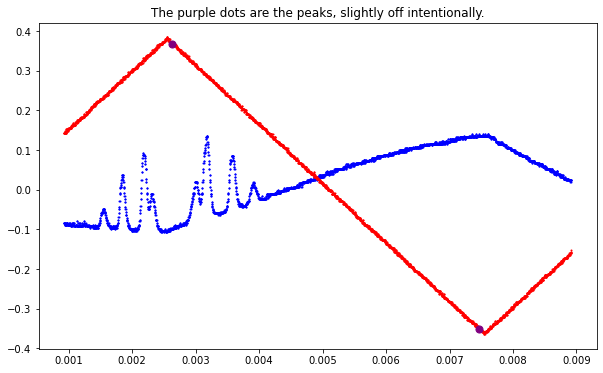

In [5]:
# Finding the min and max values of the triangle wave
y_min_position = findPeaks(cleanedUpTriangleWaveData).min()
y_max_position = findPeaks(cleanedUpTriangleWaveData).max()

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(cleanedUp4PeakData['x'], cleanedUp4PeakData['y'], c='blue', s=1)
ax1.scatter(cleanedUpTriangleWaveData['x'], cleanedUpTriangleWaveData['y'], c='red', s=1)
ax1.scatter(y_min_position[0], y_min_position[1], s=50, c='purple')
ax1.scatter(y_max_position[0], y_max_position[1], s=50, c='purple')

plt.title('The purple dots are the peaks, slightly off intentionally.' )


# Chopping off the ends of the data

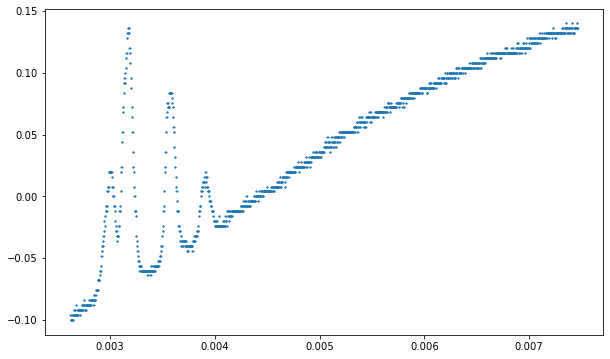

In [6]:
# Chopping off the ends of the data that are outside the above purple points.

chopped4PeakData = cleanedUp4PeakData.loc[(cleanedUp4PeakData.x >= y_max_position[0]) &
                                          (cleanedUp4PeakData.x <= y_min_position[0])]


# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=1)



# Fitting the curve

Text(0.5, 1.0, 'Fitting the chopped data with an exponential and a 4 gaussian function together.')

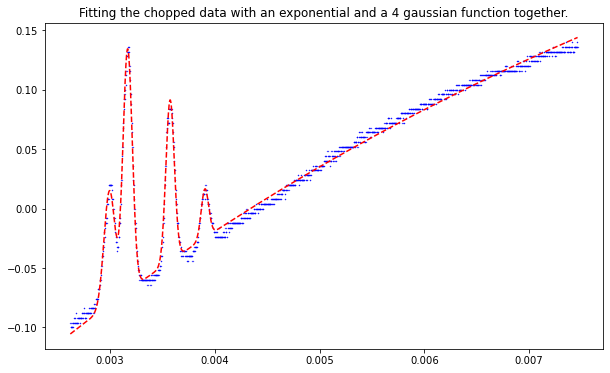

In [83]:
#Fitting the curve.

def exponentialAndGaussian(x, a,k,b, amp1,cen1,sigma1, amp2,cen2,sigma2, amp3,cen3,sigma3, amp4,cen4,sigma4):
    return ((a*np.exp(k*x) + b) +
            (amp1*(1/(sigma1*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen1)/sigma1)**2.0))) +
            amp2*(1/(sigma2*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen2)/sigma2)**2.0))) +
            amp3*(1/(sigma3*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen3)/sigma3)**2.0))) +
            amp4*(1/(sigma4*(np.sqrt(2*np.pi))))*(np.exp((-1.0/2.0)*(((x-cen4)/sigma4)**2.0)))))

# Initial guess of the parameters of the fit
guess = [-1,3,-0.1, 0.01,0.0030,1e-5, 0.01,0.0032,1e-5, 0.01,0.0035,1e-5, 0.01,0.00390,1e-5]
parameters_exponential, pcov_exponential = curve_fit(f = exponentialAndGaussian, 
                                                     xdata = chopped4PeakData['x'], 
                                                     ydata = chopped4PeakData['y'], 
                                                     p0=guess)


aExp, kExp, bExp = parameters_exponential[0], parameters_exponential[1], parameters_exponential[2]

ampl1, cent1, sigm1 = parameters_exponential[3], parameters_exponential[4], parameters_exponential[5]
ampl2, cent2, sigm2 = parameters_exponential[6], parameters_exponential[7], parameters_exponential[8]
ampl3, cent3, sigm3 = parameters_exponential[9], parameters_exponential[10], parameters_exponential[11]
ampl4, cent4, sigm4 = parameters_exponential[12], parameters_exponential[13], parameters_exponential[14]


curveFitValues = [exponentialAndGaussian(i,aExp,kExp,bExp, ampl1,cent1,sigm1, ampl2,cent2,sigm2, ampl3,cent3,sigm3,
                              ampl4,cent4,sigm4) for i in chopped4PeakData['x']]

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=0.1, c='blue')
ax1.plot(chopped4PeakData['x'], curveFitValues, '--', c='red')


plt.title("Fitting the chopped data with an exponential and a 4 gaussian function together.")

# Estimating the error using technique learned in lab

Text(0.5, 1.0, 'The linear segment I am going to try to use.')

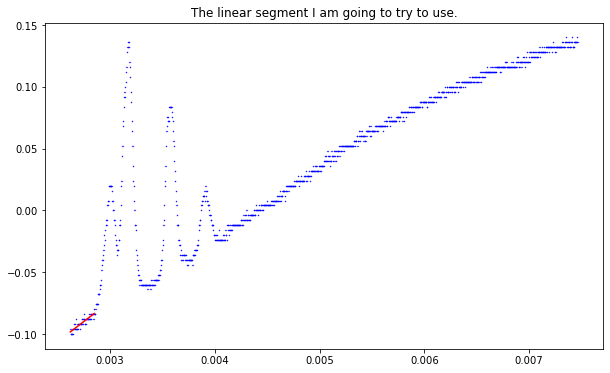

In [69]:
# Estimating the error using the technique learned in 9/24 lab
#--> due to the fact of the thickness of the blue line.

# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

linearSegment4PeakData = chopped4PeakData.loc[chopped4PeakData.x <= 0.00285]

ax1.scatter(chopped4PeakData['x'], chopped4PeakData['y'], s=0.1, c='blue')


def linear(x, a, b):
    return a*x+b

guess = [1,1]
parametersLinear, covLinear = curve_fit(f=linear,
                                       xdata = linearSegment4PeakData['x'],
                                       ydata = linearSegment4PeakData['y'],
                                       p0 = guess)
a = parametersLinear[0]
b = parametersLinear[1]

linearOutputValues = pd.DataFrame(linearSegment4PeakData['x'])
linearOutputValues['y'] = [linear(i,a,b) for i in linearSegment4PeakData['x']]

# The linear best fit to this linear-ish segment
ax1.plot(linearSegment4PeakData['x'], linearOutputValues['y'], c='red')

plt.title("The linear segment I am going to try to use.")


            x  y_segmentRawData  y_bestFit    diff_y  diff_y_squared
0    0.002622            -0.096  -0.098326  0.002326    5.411378e-06
1    0.002624            -0.096  -0.098196  0.002196    4.821201e-06
2    0.002626            -0.100  -0.098065 -0.001935    3.743414e-06
3    0.002628            -0.100  -0.097935 -0.002065    4.265481e-06
4    0.002630            -0.100  -0.097804 -0.002196    4.821616e-06
..        ...               ...        ...       ...             ...
110  0.002842            -0.088  -0.083970 -0.004030    1.624307e-05
111  0.002844            -0.088  -0.083839 -0.004161    1.731211e-05
112  0.002846            -0.080  -0.083709  0.003709    1.375448e-05
113  0.002848            -0.080  -0.083578  0.003578    1.280344e-05
114  0.002850            -0.084  -0.083448 -0.000552    3.050617e-07

[115 rows x 5 columns]
Sigma y value calculated for this linear segment: 0.002304690856435031


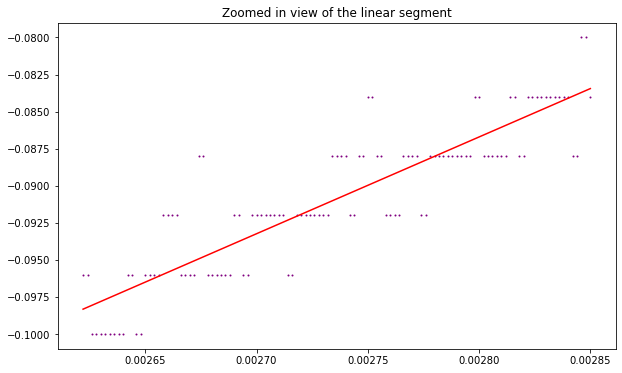

In [101]:
# For the plots in this file
fig = plt.figure(figsize=(10,6))
gs = gridspec.GridSpec(1,1)
ax1 = fig.add_subplot(gs[0])

ax1.scatter(linearSegment4PeakData['x'], linearSegment4PeakData['y'], s=1, c='purple')
ax1.plot(linearSegment4PeakData['x'], linearOutputValues['y'], c='red')

plt.title('Zoomed in view of the linear segment')

# Merging the two data sets for easier difference calculation
result = pd.merge(linearSegment4PeakData, linearOutputValues, on=['x'])
result.columns = ['x', 'y_segmentRawData','y_bestFit']

# Calculating the difference between the raw data and the best fit y values, then squaring each of those columns
result['diff_y'] = result['y_segmentRawData'] - result['y_bestFit']
result['diff_y_squared'] = result['diff_y']**2.0
print(result)
sumOfDifferences = result['diff_y_squared'].sum()
numberOfRows = result['diff_y_squared'].count()


sigmaY = np.sqrt(sumOfDifferences/numberOfRows)
print('Sigma y value calculated for this linear segment:',sigmaY)


# Calculating the chi-squared for this best fit plot

In [100]:
#chopped4PeakData['x'], chopped4PeakData['y']

# Creating a pandas dataframe that contains the best fit values with its corresponding x-value
wholeCurveBestFitValues = pd.DataFrame(chopped4PeakData['x'])
wholeCurveBestFitValues['y_bestFit'] = [exponentialAndGaussian(i,aE,kE,bE, 
                                                               ampl1,cent1,sigm1, 
                                                               ampl2,cent2,sigm2, 
                                                               ampl3,cent3,sigm3,
                                                               ampl4,cent4,sigm4) 
                                                            for i in chopped4PeakData['x']]
# Merging the two dataframes based off their x values
totalData = pd.merge(chopped4PeakData, wholeCurveBestFitValues, on=['x'])
totalData.columns = ['x', 'y_rawData', 'y_bestFit']

# Taking the difference between the raw data and the best fit values
totalData['y_diff'] = totalData['y_rawData'] - totalData['y_bestFit']

# Squaring the difference of the raw data and best fit values
totalData['y_diffSquared'] = totalData['y_diff']**2.0

# Dividing the difference squared by the sigma value calculated in previous box squared
totalData['y_diffSquared_dividedBySigmaSquared'] = totalData['y_diffSquared'] / (sigmaY**2.0)

# Summing up all of the rows in the previously calculated column
sumOfDiffSquaredDividedBySigmaSquared = totalData['y_diffSquared_dividedBySigmaSquared'].sum()
print('Sum:',sumOfDiffSquaredDividedBySigmaSquared)

numberOfRowsInDataframeColumns = totalData['y_diffSquared_dividedBySigmaSquared'].count()

print('Degrees of freedom:', numberOfRowsInDataframeColumns)

chiSquared_reduced_value = sumOfDiffSquaredDividedBySigmaSquared / numberOfRowsInDataframeColumns
print('Chi-squared reduced value:', chiSquared_reduced_value)

Sum: 10507.257930305903
Degrees of freedom: 2421
Chi-squared reduced value: 4.340048711402686
